<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/6_3_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merge

형태가 다른 데이터프레임을 합칠 때 사용합니다. 

애플 스토어의 앱 데이터를 가지고 연습해봅시다

https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

In [ ]:
from google.colab import drive
drive.mount('/g')

Drive already mounted at /g; to attempt to forcibly remount, call drive.mount("/g", force_remount=True).


In [ ]:
import pandas as pd

app = pd.read_csv('/g/My Drive/Tensorflow AI/AppleStore.csv', index_col=0)
desc= pd.read_csv('/g/My Drive/Tensorflow AI/appleStore_description.csv')

In [ ]:
app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [ ]:
desc.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


app에 desc에 있는 app_desc를 컬럼으로 추가해봅시다. 
사용법은 pd.merge(left, right, how='left', on=['key1', 'key2'])

In [ ]:
df = pd.merge(app, desc[['id', 'app_desc']], how = 'left', on = 'id')

In [ ]:
df

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1,Place the falling blocks correctly in order to...
7193,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1,A thrilling virtual reality roller coaster exp...
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1,"Rock star Bret Michaels, winner of Celebrity A..."
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1,VR Roller Coaster World is an app for Google C...


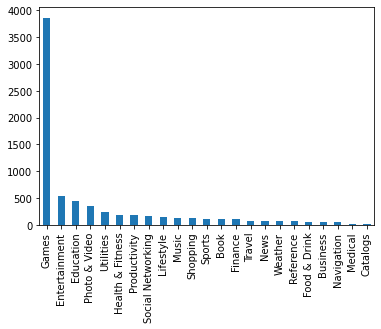

In [ ]:
# 어떤 장르가 가장 인기있는지 살펴봅시다
genre = df.prime_genre.value_counts()
genre.plot.bar()

In [ ]:
genre

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [ ]:
# 가장 사용자평가가 가장좋은 앱의 이름과 description을 출력해봅시다
# 사용자평가가 10000건 이상인 앱을 대상으로 봅시다

clean = df.query('rating_count_tot>=10000')
final = clean.sort_values(['user_rating','rating_count_tot'], ascending = False).head(100)
final = final.filter(['track_name','price', 'prime_genre','user_rating','app_desc', 'rating_count_tot' ])



In [ ]:
final

,track_name,price,prime_genre,user_rating,app_desc,rating_count_tot
1104,Head Soccer,0.00,Games,5.0,◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆\nApp store(...,481564
302,Plants vs. Zombies,0.99,Games,5.0,The game requires iOS 6 compatible device.\n\n...,426463
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,0.00,Games,5.0,Ready to have FUN? Download now the best shoot...,386521
2177,Geometry Dash Lite,0.00,Games,5.0,Jump and fly your way through danger in this r...,370370
498,Infinity Blade,0.99,Games,5.0,Winner of the Apple Design Award and 30+ “Game...,326482
...,...,...,...,...,...,...
1182,Clear Vision (17+),0.99,Games,4.5,#1 Sniper game on the App Store worldwide!\n\n...,541693
1052,Minecraft: Pocket Edition,6.99,Games,4.5,Our latest update includes new gameplay featur...,522012
265,Calorie Counter & Diet Tracker by MyFitnessPal,0.00,Health & Fitness,4.5,"Lose weight with MyFitnessPal, the fastest and...",507706
829,DragonVale,0.00,Games,4.5,Discover the most popular Dragon Collecting ga...,503230


In [ ]:
final = final.reset_index(drop=True)

In [ ]:
final.head()

,track_name,price,prime_genre,user_rating,app_desc,rating_count_tot
0,Head Soccer,0.00,Games,5.0,◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆\nApp store(...,481564
1,Plants vs. Zombies,0.99,Games,5.0,The game requires iOS 6 compatible device.\n\n...,426463
2,Sniper 3D Assassin: Shoot to Kill Gun Game,0.00,Games,5.0,Ready to have FUN? Download now the best shoot...,386521
3,Geometry Dash Lite,0.00,Games,5.0,Jump and fly your way through danger in this r...,370370
4,Infinity Blade,0.99,Games,5.0,Winner of the Apple Design Award and 30+ “Game...,326482


In [ ]:
description=final.loc[0,'app_desc']

In [ ]:
description

'◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆\nApp store(12 Country) "Overall Rank.1"\nApp store(54 Country) "Sports category Rank.1"\nThank you~ \n---------------------------------------------------------\nFrance,Germany,Hong Kong,Italy,Korea,Singapore,Spain,Austria, Cyprus,Mexico,Greece,Hungary,Indonesia,Ireland,Israel,Jordan,Kuwait,Luxembourg,Macau,Malaysia,Netherlands,Poland,Portugal,Saudi Arabia,Sweden,Switzerland,Taiwan,Thailand,Turkey,United Kingdom,Uruguay,Vietnam\n---\n◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆\n\nMove to the side, hard-to-control soccer !\nA soccer game with easy controls that everyone can learn in 1 second.\n\nBeat the opponent with fancy lethal shots such as dragon shoot, ice shoot and lightening shoot and win the tournament.\nYou can also matchup with friends or global users through the gamecenter.\n\nPlay this fun soccer game anytime, anywhere.\n\n\n■■ FEATURES ■■\n\n+ Various 69 Avatars & Unique Special Shot !!\n+ 6 Game mode (Arcade, Tournament, Survival, League, Head Cu

In [ ]:
# markdown을 출력 
import markdown
from bs4 import BeautifulSoup
html = markdown.markdown(description)
print("".join(BeautifulSoup(html).findAll(text=True)))

◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆
App store(12 Country) "Overall Rank.1"
App store(54 Country) "Sports category Rank.1"
Thank you~ 

France,Germany,Hong Kong,Italy,Korea,Singapore,Spain,Austria, Cyprus,Mexico,Greece,Hungary,Indonesia,Ireland,Israel,Jordan,Kuwait,Luxembourg,Macau,Malaysia,Netherlands,Poland,Portugal,Saudi Arabia,Sweden,Switzerland,Taiwan,Thailand,Turkey,United Kingdom,Uruguay,Vietnam
◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆◆
Move to the side, hard-to-control soccer !
A soccer game with easy controls that everyone can learn in 1 second.
Beat the opponent with fancy lethal shots such as dragon shoot, ice shoot and lightening shoot and win the tournament.
You can also matchup with friends or global users through the gamecenter.
Play this fun soccer game anytime, anywhere.
■■ FEATURES ■■

Various 69 Avatars & Unique Special Shot !!
6 Game mode (Arcade, Tournament, Survival, League, Head Cup, Death Mode)
Bluetooth Multi Play Mode
  (Play with your friends near !!)
Online Multiplay